In [1]:
import json
import pandas as pd

In [2]:
test_run = 'run_2025-11-28_17-25-46'
merged_json_file_path = f'testdata/{test_run}/merged_results.json'

In [3]:
df = pd.read_json(merged_json_file_path)
df['global_id'] = df['instance'] + "_" + df['operation_id'].astype(str)
df.head(20)

,instance,operation_id,operation_type,file_size,source_file_path,file_path,start_timestamp,start_timestamp_ns,end_timestamp,end_timestamp_ns,duration_seconds,success,error,global_id
0,server127.0.0.1_instance1,0,copy_file,1042157.0,,unmonitored\file-example_PDF_1MB.pdf,2025-11-28T17:26:16.200176,1764347176200187300,2025-11-28T17:26:16.577027,1764347176577033000,0.376836,True,NaN,server127.0.0.1_instance1_0
1,server127.0.0.1_instance1,1,delete_file,1042157.0,,\\T14G4-PF4RA1BE\performance_test_monitored\co...,2025-11-28T17:26:17.346083,1764347177346089600,2025-11-28T17:26:17.497543,1764347177497555500,0.151449,True,NaN,server127.0.0.1_instance1_1
2,server127.0.0.1_instance1,2,copy_file,469513.0,,unmonitored\file-example_PDF_500_kB.pdf,2025-11-28T17:26:19.412425,1764347179412433100,2025-11-28T17:26:19.524256,1764347179524264900,0.111819,True,NaN,server127.0.0.1_instance1_2
3,server127.0.0.1_instance1,3,delete_file,469513.0,,\\T14G4-PF4RA1BE\performance_test_monitored\co...,2025-11-28T17:26:20.997056,1764347180997067200,2025-11-28T17:26:21.002460,1764347181002467600,0.005389,True,NaN,server127.0.0.1_instance1_3
4,server127.0.0.1_instance1,4,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:26:22.402620,1764347182402628100,2025-11-28T17:26:25.440675,1764347185440681500,3.038044,True,NaN,server127.0.0.1_instance1_4
5,server127.0.0.1_instance1,5,delete_dir,NaN,,\\T14G4-PF4RA1BE\performance_test_monitored\co...,2025-11-28T17:26:26.852134,1764347186852143000,2025-11-28T17:26:27.043937,1764347187043945100,0.191792,True,NaN,server127.0.0.1_instance1_5
6,server127.0.0.1_instance1,6,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:26:29.008051,1764347189008059900,2025-11-28T17:26:31.660548,1764347191660556700,2.652485,True,NaN,server127.0.0.1_instance1_6
7,server127.0.0.1_instance1,7,delete_dir,NaN,,\\T14G4-PF4RA1BE\performance_test_monitored\co...,2025-11-28T17:26:32.229879,1764347192229887800,2025-11-28T17:26:32.304369,1764347192304376200,0.074478,True,NaN,server127.0.0.1_instance1_7
8,server127.0.0.1_instance1,8,move_dir,1042157.0,,\\T14G4-PF4RA1BE\performance_test_monitored\mo...,2025-11-28T17:26:33.477453,1764347193477488800,2025-11-28T17:26:33.597515,1764347193597522000,0.120024,True,NaN,server127.0.0.1_instance1_8
9,server127.0.0.1_instance1,9,move_dir,469513.0,,\\T14G4-PF4RA1BE\performance_test_monitored\mo...,2025-11-28T17:26:35.118774,1764347195118782300,2025-11-28T17:26:35.122084,1764347195122095200,0.003298,True,NaN,server127.0.0.1_instance1_9


In [4]:
df['duration_seconds'].describe()

count    560.000000
mean       0.250515
std        0.484398
min        0.001210
25%        0.024682
50%        0.063606
75%        0.119972
max        3.038044
Name: duration_seconds, dtype: float64

In [5]:
df.groupby('operation_type')['duration_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
operation_type,,,,,,,,
copy_dir,80.0,1.380050,0.364926,1.027991,1.206255,1.281389,1.410238,3.038044
copy_file,80.0,0.093766,0.071147,0.008800,0.046245,0.075386,0.121306,0.376836
delete_dir,80.0,0.116479,0.059633,0.039909,0.082507,0.105305,0.131624,0.523286
delete_file,80.0,0.035896,0.035963,0.001210,0.004623,0.022586,0.062135,0.151449
edit_file,80.0,0.064245,0.039648,0.017738,0.028219,0.054553,0.095399,0.166060
move_dir,80.0,0.033643,0.031965,0.001733,0.004409,0.023077,0.058917,0.120024
read_file,80.0,0.029521,0.026382,0.003471,0.006540,0.028683,0.046456,0.120110


In [6]:
df.groupby('instance')['duration_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
instance,,,,,,,,
server127.0.0.1_instance1,70.0,0.321926,0.651033,0.001835,0.024900,0.079912,0.148165,3.038044
server127.0.0.1_instance2,70.0,0.271932,0.548238,0.001263,0.032083,0.057349,0.139911,2.603131
server127.0.0.1_instance3,70.0,0.247351,0.476292,0.002618,0.026979,0.062507,0.123906,2.199027
server127.0.0.1_instance4,70.0,0.231572,0.436201,0.001210,0.027107,0.061855,0.110021,1.477165
server127.0.0.1_instance5,70.0,0.234214,0.432369,0.001733,0.022778,0.057619,0.112546,1.492826
server127.0.0.1_instance6,70.0,0.229473,0.424368,0.002604,0.024094,0.063861,0.121622,1.447579
server127.0.0.1_instance7,70.0,0.229816,0.428026,0.001743,0.026837,0.069144,0.119276,1.474846
server127.0.0.1_instance8,70.0,0.237832,0.449257,0.001843,0.026132,0.062579,0.111824,1.610195


In [7]:
df.groupby(['instance', 'operation_type'])['duration_seconds'].describe()

count      mean       std       min  \
instance                  operation_type                                        
server127.0.0.1_instance1 copy_dir         10.0  1.778741  0.677326  1.185397   
                          copy_file        10.0  0.157283  0.124256  0.015796   
                          delete_dir       10.0  0.114377  0.045302  0.071963   
                          delete_file      10.0  0.052373  0.056298  0.004011   
                          edit_file        10.0  0.078165  0.054986  0.023028   
                          move_dir         10.0  0.036743  0.040531  0.001835   
                          read_file        10.0  0.035805  0.034532  0.004659   
server127.0.0.1_instance2 copy_dir         10.0  1.526993  0.491400  1.057802   
                          copy_file        10.0  0.107966  0.080628  0.015501   
                          delete_dir       10.0  0.112471  0.045678  0.054352   
                          delete_file      10.0  0.032650  0.031640  0.001263   
                          edit_file        10.0  0.063263  0.034621  0.028311   
                          move_dir         10.0  0.035105  0.037184  0.003014   
                          read_file        10.0  0.025078  0.018530  0.005018   
server127.0.0.1_instance3 copy_dir         10.0  1.360520  0.337528  1.119877   
                          copy_file        10.0  0.093884  0.073985  0.016365   
                          delete_dir       10.0  0.109686  0.047974  0.039909   
                          delete_file      10.0  0.037260  0.038561  0.002618   
                          edit_file        10.0  0.063494  0.043433  0.020495   
                          move_dir         10.0  0.038305  0.034006  0.003420   
                          read_file        10.0  0.028305  0.021498  0.004264   
server127.0.0.1_instance4 copy_dir         10.0  1.282823  0.116563  1.094574   
                          copy_file        10.0  0.081212  0.050470  0.011601   
                          delete_dir       10.0  0.103809  0.025468  0.065040   
                          delete_file      10.0  0.034551  0.036246  0.001210   
                          edit_file        10.0  0.061139  0.036188  0.022721   
                          move_dir         10.0  0.029038  0.026482  0.001755   
                          read_file        10.0  0.028433  0.025119  0.004395   
server127.0.0.1_instance5 copy_dir         10.0  1.264215  0.146023  1.035639   
                          copy_file        10.0  0.081341  0.044880  0.016880   
                          delete_dir       10.0  0.143232  0.137690  0.054020   
                          delete_file      10.0  0.028934  0.027093  0.003064   
                          edit_file        10.0  0.061497  0.041778  0.017738   
                          move_dir         10.0  0.029442  0.026254  0.001733   
                          read_file        10.0  0.030838  0.036173  0.004144   
server127.0.0.1_instance6 copy_dir         10.0  1.248262  0.134146  1.027991   
                          copy_file        10.0  0.081573  0.055705  0.008800   
                          delete_dir       10.0  0.122655  0.047863  0.066582   
                          delete_file      10.0  0.032010  0.029715  0.003290   
                          edit_file        10.0  0.063413  0.041106  0.023232   
                          move_dir         10.0  0.030679  0.028587  0.002604   
                          read_file        10.0  0.027720  0.023625  0.003740   
server127.0.0.1_instance7 copy_dir         10.0  1.259121  0.132912  1.052121   
                          copy_file        10.0  0.069743  0.034589  0.024536   
                          delete_dir       10.0  0.119407  0.033441  0.079049   
                          delete_file      10.0  0.035945  0.037074  0.001934   
                          edit_file        10.0  0.061561  0.034251  0.019117   
                          move_dir         10.0  0.035555  0.037658  0.00

In [8]:
df['success'].value_counts()

success
True    560
Name: count, dtype: int64

In [9]:
df.groupby('instance')['success'].value_counts().unstack(fill_value=0)

success,True
instance,
server127.0.0.1_instance1,70
server127.0.0.1_instance2,70
server127.0.0.1_instance3,70
server127.0.0.1_instance4,70
server127.0.0.1_instance5,70
server127.0.0.1_instance6,70
server127.0.0.1_instance7,70
server127.0.0.1_instance8,70


In [10]:
df.groupby('operation_type')['duration_seconds'].sum()

operation_type
copy_dir       110.404026
copy_file        7.501309
delete_dir       9.318349
delete_file      2.871713
edit_file        5.139583
move_dir         2.691474
read_file        2.361715
Name: duration_seconds, dtype: float64

In [11]:
df.groupby('instance')['duration_seconds'].sum()

instance
server127.0.0.1_instance1    22.534855
server127.0.0.1_instance2    19.035257
server127.0.0.1_instance3    17.314556
server127.0.0.1_instance4    16.210039
server127.0.0.1_instance5    16.394992
server127.0.0.1_instance6    16.063109
server127.0.0.1_instance7    16.087101
server127.0.0.1_instance8    16.648259
Name: duration_seconds, dtype: float64

In [12]:
df.groupby(['instance', 'operation_type'])['duration_seconds'].sum()

instance                   operation_type
server127.0.0.1_instance1  copy_dir          17.787406
                           copy_file          1.572828
                           delete_dir         1.143772
                           delete_file        0.523727
                           edit_file          0.781649
                           move_dir           0.367426
                           read_file          0.358048
server127.0.0.1_instance2  copy_dir          15.269926
                           copy_file          1.079663
                           delete_dir         1.124706
                           delete_file        0.326504
                           edit_file          0.632630
                           move_dir           0.351048
                           read_file          0.250781
server127.0.0.1_instance3  copy_dir          13.605201
                           copy_file          0.938845
                           delete_dir         1.096864
                       

In [13]:
df_files = df[df['file_size'].notna()].copy()
df_files['mb'] = df_files['file_size'] / (1024 * 1024)
df_files['mb_per_sec'] = df_files['mb'] / df_files['duration_seconds']
df_files[['global_id', 'instance', 'operation_type', 'file_size', 'duration_seconds', 'mb_per_sec']]

,global_id,instance,operation_type,file_size,duration_seconds,mb_per_sec
0,server127.0.0.1_instance1_0,server127.0.0.1_instance1,copy_file,1042157.0,0.376836,2.637430
1,server127.0.0.1_instance1_1,server127.0.0.1_instance1,delete_file,1042157.0,0.151449,6.562454
2,server127.0.0.1_instance1_2,server127.0.0.1_instance1,copy_file,469513.0,0.111819,4.004351
3,server127.0.0.1_instance1_3,server127.0.0.1_instance1,delete_file,469513.0,0.005389,83.089775
8,server127.0.0.1_instance1_8,server127.0.0.1_instance1,move_dir,1042157.0,0.120024,8.280643
...,...,...,...,...,...,...
555,server127.0.0.1_instance8_65,server127.0.0.1_instance8,move_dir,12.0,0.006479,0.001766
556,server127.0.0.1_instance8_66,server127.0.0.1_instance8,edit_file,824.0,0.131893,0.005958
557,server127.0.0.1_instance8_67,server127.0.0.1_instance8,edit_file,927.0,0.029914,0.029554
558,server127.0.0.1_instance8_68,server127.0.0.1_instance8,read_file,12.0,0.056593,0.000202


In [14]:
file_ops = ['copy_file', 'edit_file', 'read_file', 'delete_file']
df[df['operation_type'].isin(file_ops)].groupby('operation_type')['duration_seconds'].mean()

operation_type
copy_file      0.093766
delete_file    0.035896
edit_file      0.064245
read_file      0.029521
Name: duration_seconds, dtype: float64

In [15]:
df[df['operation_type'].isin(file_ops)].groupby(['instance', 'operation_type'])['duration_seconds'].mean()

instance                   operation_type
server127.0.0.1_instance1  copy_file         0.157283
                           delete_file       0.052373
                           edit_file         0.078165
                           read_file         0.035805
server127.0.0.1_instance2  copy_file         0.107966
                           delete_file       0.032650
                           edit_file         0.063263
                           read_file         0.025078
server127.0.0.1_instance3  copy_file         0.093884
                           delete_file       0.037260
                           edit_file         0.063494
                           read_file         0.028305
server127.0.0.1_instance4  copy_file         0.081212
                           delete_file       0.034551
                           edit_file         0.061139
                           read_file         0.028433
server127.0.0.1_instance5  copy_file         0.081341
                           delete_file  

In [16]:
df.sort_values('duration_seconds', ascending=False).head(10)

,instance,operation_id,operation_type,file_size,source_file_path,file_path,start_timestamp,start_timestamp_ns,end_timestamp,end_timestamp_ns,duration_seconds,success,error,global_id
4,server127.0.0.1_instance1,4,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:26:22.402620,1764347182402628100,2025-11-28T17:26:25.440675,1764347185440681500,3.038044,True,NaN,server127.0.0.1_instance1_4
6,server127.0.0.1_instance1,6,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:26:29.008051,1764347189008059900,2025-11-28T17:26:31.660548,1764347191660556700,2.652485,True,NaN,server127.0.0.1_instance1_6
74,server127.0.0.1_instance2,4,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:26:41.293897,1764347201293904300,2025-11-28T17:26:43.897038,1764347203897048200,2.603131,True,NaN,server127.0.0.1_instance2_4
18,server127.0.0.1_instance1,18,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:26:45.529165,1764347205529173500,2025-11-28T17:26:47.968487,1764347207968496400,2.439310,True,NaN,server127.0.0.1_instance1_18
144,server127.0.0.1_instance3,4,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:26:47.225188,1764347207225194800,2025-11-28T17:26:49.424224,1764347209424230700,2.199027,True,NaN,server127.0.0.1_instance3_4
76,server127.0.0.1_instance2,6,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:26:46.195922,1764347206195930200,2025-11-28T17:26:48.354314,1764347208354401700,2.158380,True,NaN,server127.0.0.1_instance2_6
20,server127.0.0.1_instance1,20,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:26:49.969682,1764347209969688800,2025-11-28T17:26:51.735699,1764347211735708700,1.766007,True,NaN,server127.0.0.1_instance1_20
116,server127.0.0.1_instance2,46,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:27:37.943730,1764347257943738200,2025-11-28T17:27:39.671505,1764347259671515700,1.727763,True,NaN,server127.0.0.1_instance2_46
146,server127.0.0.1_instance3,6,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:26:51.597393,1764347211597400800,2025-11-28T17:26:53.247808,1764347213247819100,1.650404,True,NaN,server127.0.0.1_instance3_6
522,server127.0.0.1_instance8,32,copy_dir,NaN,,unmonitored\complex_folder,2025-11-28T17:27:37.788054,1764347257788062000,2025-11-28T17:27:39.398261,1764347259398270100,1.610195,True,NaN,server127.0.0.1_instance8_32


In [17]:
def round_to_list(value):
    return min(mb_values, key=lambda x: abs(x - value))

mb_values = [0.1, 0.2, 0.5, 1, 1.5, 2]
df_files['rounded_mb'] = df_files['mb'].apply(round_to_list)
df_files[['instance', 'mb', 'rounded_mb']]

,instance,mb,rounded_mb
0,server127.0.0.1_instance1,0.993878,1.0
1,server127.0.0.1_instance1,0.993878,1.0
2,server127.0.0.1_instance1,0.447762,0.5
3,server127.0.0.1_instance1,0.447762,0.5
8,server127.0.0.1_instance1,0.993878,1.0
...,...,...,...
555,server127.0.0.1_instance8,0.000011,0.1
556,server127.0.0.1_instance8,0.000786,0.1
557,server127.0.0.1_instance8,0.000884,0.1
558,server127.0.0.1_instance8,0.000011,0.1


In [18]:
df_files.groupby(['rounded_mb', 'operation_type'])['duration_seconds'].describe()

count      mean       std       min       25%  \
rounded_mb operation_type                                                  
0.1        copy_file        40.0  0.072070  0.062946  0.008800  0.033688   
           delete_file      40.0  0.028092  0.031736  0.001263  0.004300   
           edit_file        80.0  0.064245  0.039648  0.017738  0.028219   
           move_dir         40.0  0.028117  0.030377  0.001835  0.004639   
           read_file        80.0  0.029521  0.026382  0.003471  0.006540   
0.2        copy_file         8.0  0.118903  0.043714  0.084787  0.089323   
           delete_file       8.0  0.057277  0.022282  0.034876  0.044039   
           move_dir          8.0  0.054237  0.005699  0.047841  0.049213   
0.5        copy_file        16.0  0.062598  0.027685  0.026468  0.044803   
           delete_file      16.0  0.004512  0.002016  0.001210  0.003235   
           move_dir         16.0  0.003963  0.001710  0.001733  0.003142   
1.0        copy_file        16.0  0.166608  0.080068  0.085484  0.118671   
           delete_file      16.0  0.076102  0.027861  0.043036  0.061034   
           move_dir         16.0  0.066842  0.023261  0.033934  0.052478   

                                50%       75%       max  
rounded_mb operation_type                                
0.1        copy_file       0.059294  0.087152  0.358268  
           delete_file     0.005855  0.056878  0.117513  
           edit_file       0.054553  0.095399  0.166060  
           move_dir        0.007281  0.053547  0.109624  
           read_file       0.028683  0.046456  0.120110  
0.2        copy_file       0.101388  0.127930  0.203330  
           delete_file     0.051943  0.063600  0.105851  
           move_dir        0.052953  0.059061  0.062713  
0.5        copy_file       0.055996  0.065476  0.123517  
           delete_file     0.004573  0.005220  0.010296  
           move_dir        0.003625  0.005176  0.007233  
1.0        copy_file       0.135945  0.183172  0.376836  
           delete_file     0.067102  0.081376  0.151449  
           move_dir        0.067593  0.073382  0.120024

In [19]:
df[df['success'] == True]['duration_seconds'].describe()

count    560.000000
mean       0.250515
std        0.484398
min        0.001210
25%        0.024682
50%        0.063606
75%        0.119972
max        3.038044
Name: duration_seconds, dtype: float64

In [20]:
df_files[df_files['success'] == True].groupby(['rounded_mb', 'operation_type'])['duration_seconds'].describe()

count      mean       std       min       25%  \
rounded_mb operation_type                                                  
0.1        copy_file        40.0  0.072070  0.062946  0.008800  0.033688   
           delete_file      40.0  0.028092  0.031736  0.001263  0.004300   
           edit_file        80.0  0.064245  0.039648  0.017738  0.028219   
           move_dir         40.0  0.028117  0.030377  0.001835  0.004639   
           read_file        80.0  0.029521  0.026382  0.003471  0.006540   
0.2        copy_file         8.0  0.118903  0.043714  0.084787  0.089323   
           delete_file       8.0  0.057277  0.022282  0.034876  0.044039   
           move_dir          8.0  0.054237  0.005699  0.047841  0.049213   
0.5        copy_file        16.0  0.062598  0.027685  0.026468  0.044803   
           delete_file      16.0  0.004512  0.002016  0.001210  0.003235   
           move_dir         16.0  0.003963  0.001710  0.001733  0.003142   
1.0        copy_file        16.0  0.166608  0.080068  0.085484  0.118671   
           delete_file      16.0  0.076102  0.027861  0.043036  0.061034   
           move_dir         16.0  0.066842  0.023261  0.033934  0.052478   

                                50%       75%       max  
rounded_mb operation_type                                
0.1        copy_file       0.059294  0.087152  0.358268  
           delete_file     0.005855  0.056878  0.117513  
           edit_file       0.054553  0.095399  0.166060  
           move_dir        0.007281  0.053547  0.109624  
           read_file       0.028683  0.046456  0.120110  
0.2        copy_file       0.101388  0.127930  0.203330  
           delete_file     0.051943  0.063600  0.105851  
           move_dir        0.052953  0.059061  0.062713  
0.5        copy_file       0.055996  0.065476  0.123517  
           delete_file     0.004573  0.005220  0.010296  
           move_dir        0.003625  0.005176  0.007233  
1.0        copy_file       0.135945  0.183172  0.376836  
           delete_file     0.067102  0.081376  0.151449  
           move_dir        0.067593  0.073382  0.120024

Analysis with performance data from load generator

In [21]:
import os

df_monitoring = pd.read_csv(os.path.join('monitoring', 'metrics.csv'))
df_monitoring['ts_new'] = pd.to_datetime(df_monitoring['Timestamp'])

df['ts_new'] = pd.to_datetime(df['end_timestamp'])

df_merged = pd.merge_asof(
    df.sort_values('ts_new'),
    df_monitoring.sort_values('ts_new'),
    on='ts_new',
    direction='nearest',
    tolerance=pd.Timedelta("1s")
)

<Axes: xlabel='% Processor Time', ylabel='duration_seconds'>

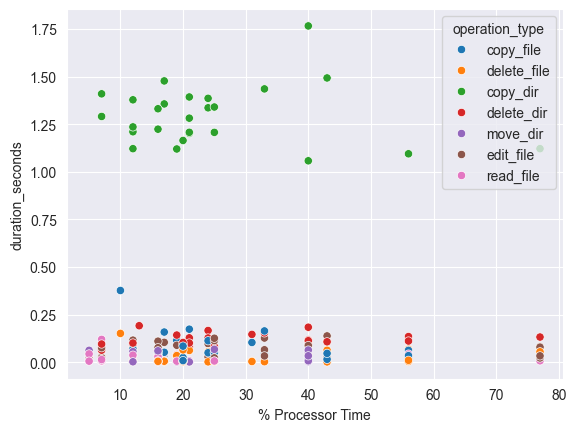

In [22]:
import seaborn as sns
sns.scatterplot(data=df_merged, x='% Processor Time', y='duration_seconds', hue='operation_type')

Text(0, 0.5, 'CPU %')

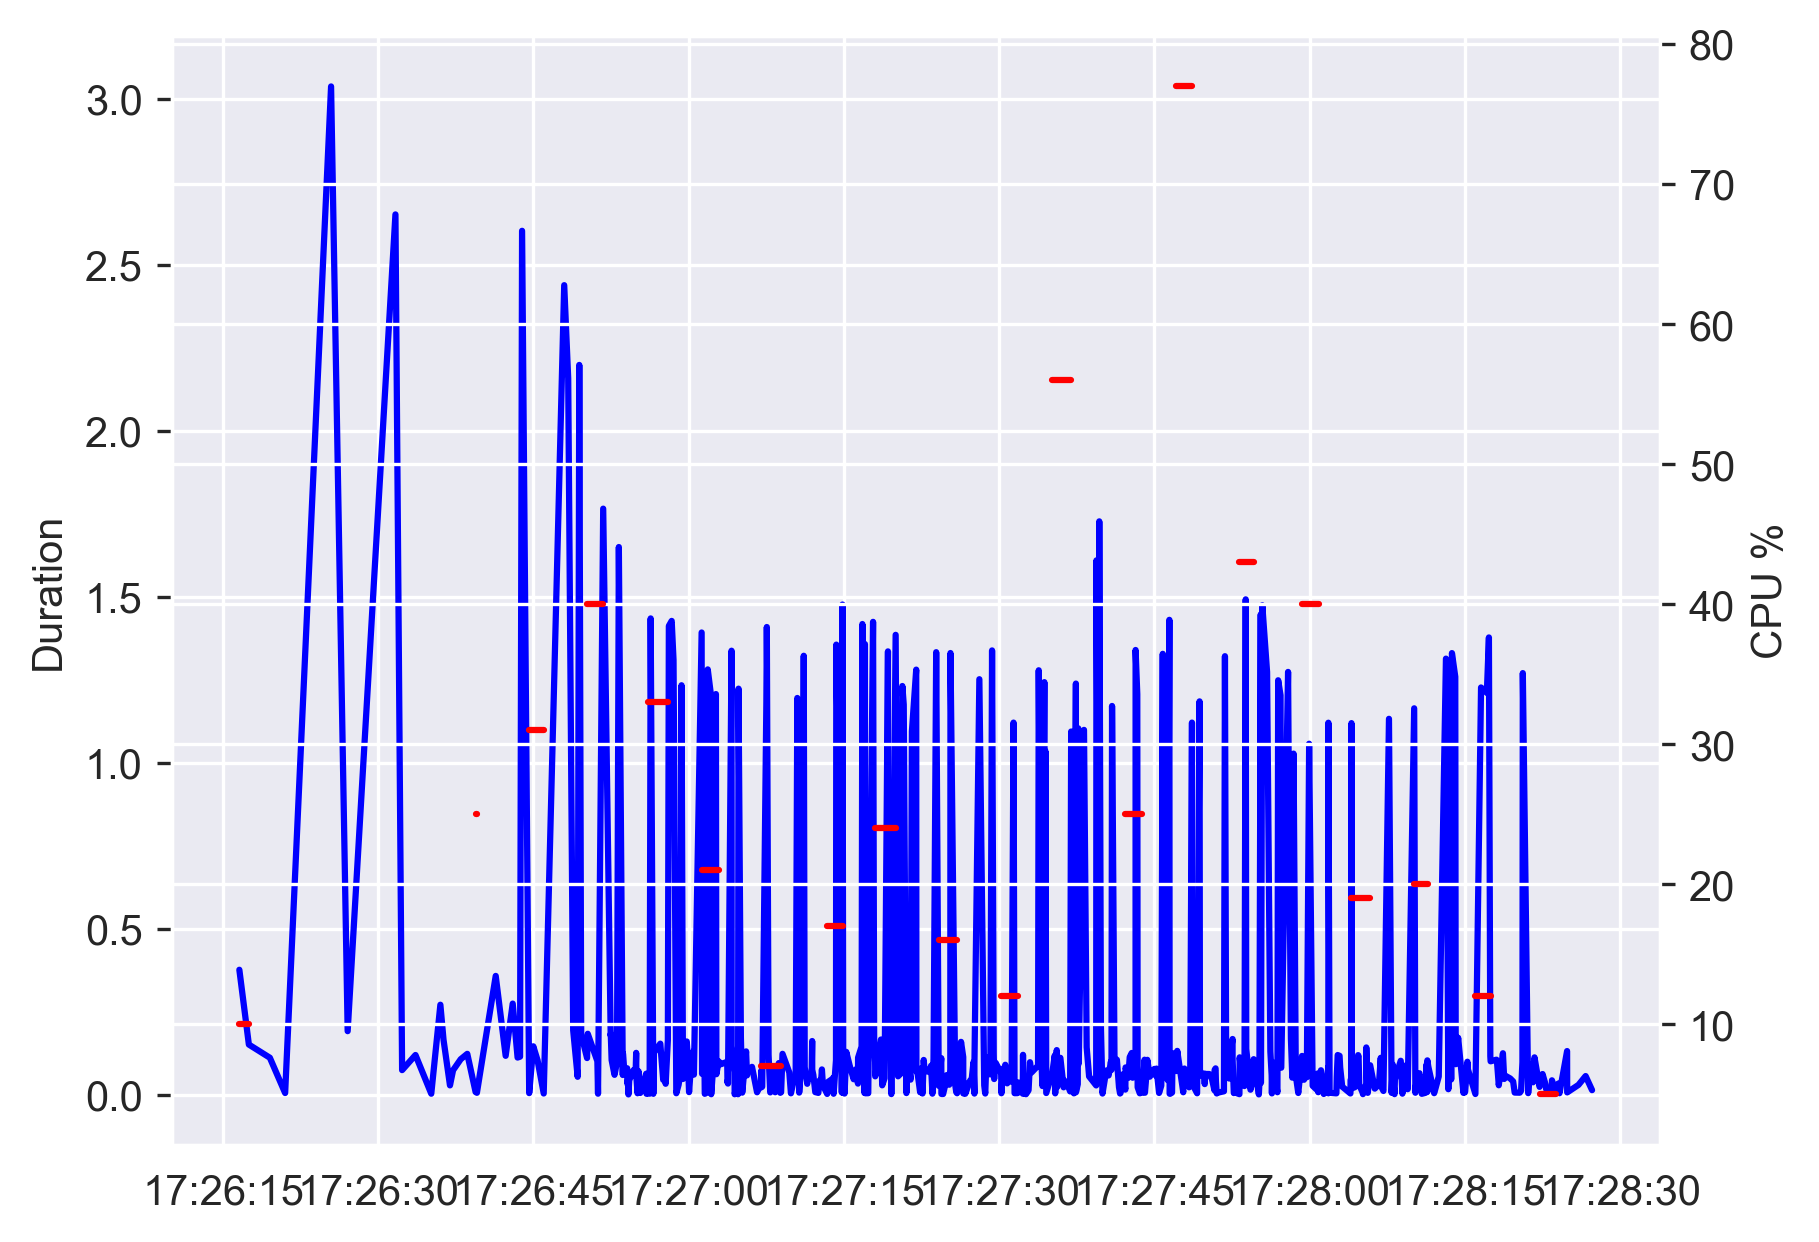

In [23]:
import matplotlib.pyplot as plt
import matplotlib

fig, ax1 = plt.subplots(dpi=300)

ax1.plot(df_merged['ts_new'], df_merged['duration_seconds'], color='blue')
ax2 = ax1.twinx()
ax2.plot(df_merged['ts_new'], df_merged['% Processor Time'], color='red')

ax1.set_ylabel("Duration")


ax2.set_ylabel("CPU %")